In [11]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import datetime

import numpyro
from numpyro.diagnostics import hpdi
import jax.numpy as jnp

import matplotlib.pyplot as plt

# add mecha-fil path here, because it is different than the module's relative path
import sys
sys.path.append('../../filecoin-mecha-twin')

import scenario_generator.utils as u
import scenario_generator.mcmc_forecast as mcmc

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
numpyro.set_host_device_count(2)

# today = datetime.datetime.now().date()
today = datetime.date(2022,11,1)
DATA_LAG_DAYS = 0
train_len_days = 180
# # --> enable this after you sort out what is going on w/ the data
train_start_date = today - datetime.timedelta(days=(DATA_LAG_DAYS + train_len_days))
train_end_date = train_start_date + datetime.timedelta(days=train_len_days)

# train_end_date = datetime.date(2022, 11, 1)
# train_start_date = train_end_date - datetime.timedelta(days=train_len_days)

print(train_start_date, train_end_date)

2022-05-05 2022-11-01


In [3]:
num_warmup_mcmc = 500
num_samples_mcmc = 100
seasonality_mcmc = 1000
num_chains_mcmc = 2

forecast_length = 365*2

In [14]:
forecast_date_vec, rb_onboard_power_pred, x_train, y_train = \
    mcmc.forecast_rb_onboard_power(train_start_date, 
                                   train_end_date,
                                   forecast_length,
                                   num_warmup_mcmc = num_warmup_mcmc,
                                   num_samples_mcmc = num_samples_mcmc,
                                   seasonality_mcmc = seasonality_mcmc,
                                   num_chains_mcmc = num_chains_mcmc)

  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]


                      mean       std    median      5.0%     95.0%     n_eff     r_hat
      coef_trend     -0.11      0.13     -0.06     -0.35     -0.00     54.16      1.04
       init_s[0]     -4.00     41.35     -0.80    -21.65     20.51    117.18      1.00
       init_s[1]      1.76      1.14      1.64      0.68      3.11    162.85      1.01
       init_s[2]      1.77      0.82      1.69      0.63      3.18     96.19      1.02
       init_s[3]      1.48      0.96      1.44     -0.25      2.97    140.22      1.00
       init_s[4]      0.81      1.00      0.77     -0.89      2.16     42.86      1.03
       init_s[5]      2.27      0.97      2.32      0.93      3.87    100.91      1.01
       init_s[6]      1.84      1.02      1.86      0.19      3.37    125.42      1.00
       init_s[7]      0.52      0.94      0.49     -1.07      1.87    120.42      1.01
       init_s[8]      0.40      1.14      0.43     -1.43      2.11     94.75      1.00
       init_s[9]     -1.11      1.15     -

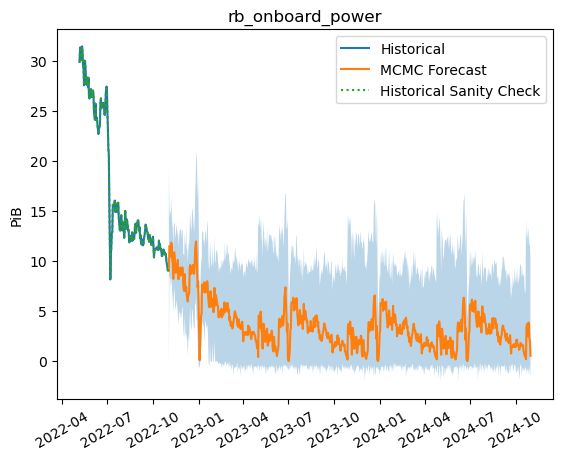

In [15]:
plt.figure()
y_pred_rb_onboard_power = jnp.median(rb_onboard_power_pred, axis=0)
hpd_low, hpd_high = hpdi(rb_onboard_power_pred)
plt.plot(x_train, y_train, label='Historical')
plt.plot(forecast_date_vec, y_pred_rb_onboard_power, label='MCMC Forecast')
plt.fill_between(forecast_date_vec, hpd_low, hpd_high, alpha=0.3)

# sanity checking utilities
t_vec, historical_rb_onboard_vec = u.get_historical_daily_onboarded_power(train_start_date, train_end_date)
plt.plot(t_vec, historical_rb_onboard_vec, linestyle=":", label='Historical Sanity Check')

plt.title('rb_onboard_power')
plt.ylabel('PiB')
plt.xticks(rotation=30)
plt.legend()

In [16]:
forecast_date_vec, renewal_rate_pred, x_train, y_train = \
    mcmc.forecast_renewal_rate(train_start_date, 
                               train_end_date,
                               forecast_length,
                               num_warmup_mcmc = num_warmup_mcmc,
                               num_samples_mcmc = num_samples_mcmc,
                               seasonality_mcmc = seasonality_mcmc,
                               num_chains_mcmc = num_chains_mcmc)

  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]


                      mean       std    median      5.0%     95.0%     n_eff     r_hat
      coef_trend      0.28      0.23      0.23      0.02      0.68     25.51      1.07
       init_s[0]      0.46     10.47      0.40    -15.25     17.53    173.66      1.01
       init_s[1]     -0.74      0.57     -0.73     -1.71      0.09    115.52      1.01
       init_s[2]     -0.36      0.64     -0.37     -1.06      0.76    116.93      1.03
       init_s[3]     -0.35      0.58     -0.30     -1.26      0.56    109.76      1.01
       init_s[4]      2.63      0.63      2.69      1.61      3.49     97.12      1.01
       init_s[5]      6.03      0.66      6.09      4.91      6.98     73.69      1.02
       init_s[6]     27.96      0.72     27.98     26.54     29.02     94.21      1.00
       init_s[7]     -0.74      0.71     -0.72     -2.02      0.30     91.21      1.00
       init_s[8]      0.48      0.73      0.56     -0.54      1.69     65.04      1.01
       init_s[9]      8.23      0.81      

  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]


                      mean       std    median      5.0%     95.0%     n_eff     r_hat
      coef_trend      0.14      0.14      0.08      0.01      0.34      3.30      1.21
       init_s[0]      0.94      7.38      0.09     -9.33     12.21     77.97      1.04
       init_s[1]     -0.26      0.54     -0.31     -0.92      0.73    138.94      1.01
       init_s[2]      0.27      0.50      0.28     -0.60      1.01    190.73      1.00
       init_s[3]     -1.64      0.54     -1.68     -2.36     -0.62     77.85      1.02
       init_s[4]      1.40      0.57      1.36      0.45      2.25     60.14      1.02
       init_s[5]     -1.11      0.60     -1.12     -2.24     -0.32     32.77      1.04
       init_s[6]     13.13      0.70     13.09     12.22     14.33     77.67      1.04
       init_s[7]     -1.92      0.59     -1.93     -2.93     -0.95     71.65      1.05
       init_s[8]     -0.53      0.59     -0.58     -1.53      0.48     46.71      1.06
       init_s[9]     20.43      0.73     2

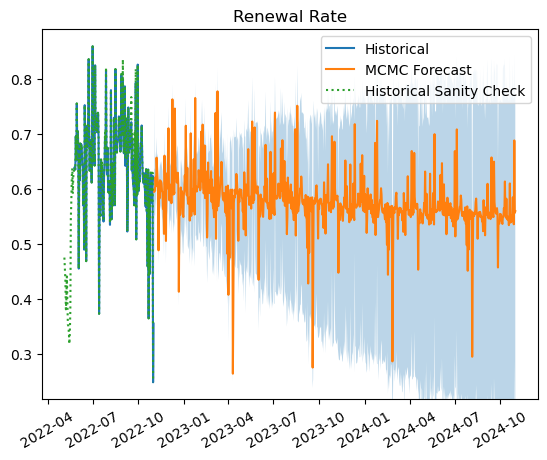

In [19]:
plt.figure()
y_pred_renewal_rate = jnp.median(renewal_rate_pred, axis=0)
hpd_low, hpd_high = hpdi(renewal_rate_pred)
plt.plot(x_train, y_train, label='Historical')
plt.plot(forecast_date_vec, y_pred_renewal_rate, label='MCMC Forecast')
plt.fill_between(forecast_date_vec, hpd_low, hpd_high, alpha=0.3)

# sanity checking utilities
t_vec, historical_rr_vec = u.get_historical_renewal_rate(train_start_date, train_end_date)
plt.plot(t_vec, historical_rr_vec, linestyle=":", label='Historical Sanity Check')

plt.title('Renewal Rate')
plt.xticks(rotation=30)
plt.legend()

In [9]:
# train_end_date = datetime.date(2022, 11, 1)
# train_start_date = train_end_date - datetime.timedelta(days=train_len_days)

# num_warmup_mcmc = 500
# num_samples_mcmc = 100
# seasonality_mcmc = 1000
# num_chains_mcmc = 2

forecast_date_vec, filplus_rate_pred, x_train, y_train = \
    mcmc.forecast_filplus_rate(train_start_date, 
                               train_end_date,
                               forecast_length,
                               num_warmup_mcmc = num_warmup_mcmc,
                               num_samples_mcmc = num_samples_mcmc,
                               seasonality_mcmc = seasonality_mcmc,
                               num_chains_mcmc = num_chains_mcmc)

  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]


                      mean       std    median      5.0%     95.0%     n_eff     r_hat
      coef_trend      0.46      0.46      0.44     -0.00      0.94      1.01     24.72
       init_s[0]      0.92      0.93      1.02     -0.08      2.10      1.02      8.27
       init_s[1]      0.04      0.12      0.05     -0.20      0.21      4.70      1.19
       init_s[2]     -0.04      0.09     -0.02     -0.22      0.08     18.22      1.11
       init_s[3]     -0.05      0.12     -0.03     -0.25      0.14      4.11      1.16
       init_s[4]     -0.16      0.29     -0.05     -0.76      0.15      1.76      1.76
       init_s[5]     -1.02      0.86     -1.26     -1.93     -0.01      1.02      6.92
       init_s[6]     -0.23      0.25     -0.15     -0.66      0.09      3.07      1.87
       init_s[7]      0.76      0.55      0.86     -0.01      1.38      1.07      3.88
       init_s[8]      0.64      0.54      0.75      0.00      1.35      1.04      5.48
       init_s[9]     -0.02      0.13     -

  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]


                      mean       std    median      5.0%     95.0%     n_eff     r_hat
      coef_trend     -0.07      0.06     -0.05     -0.16     -0.00     69.55      1.04
       init_s[0]      2.59     17.02      0.97    -29.89     27.06     26.77      1.10
       init_s[1]      0.77      0.47      0.74      0.01      1.25    180.38      1.00
       init_s[2]      1.23      0.50      1.16      0.54      2.05    141.66      1.03
       init_s[3]      1.49      0.50      1.48      0.75      2.43    123.38      1.04
       init_s[4]      0.78      0.60      0.69     -0.37      1.52    118.65      1.02
       init_s[5]      1.52      0.64      1.53      0.54      2.57     34.60      1.06
       init_s[6]      1.09      0.73      1.10      0.12      2.38     58.97      1.02
       init_s[7]      1.59      0.69      1.54      0.60      2.78     46.75      1.03
       init_s[8]      1.42      0.77      1.45      0.03      2.58     47.38      1.02
       init_s[9]     -0.06      0.75     -

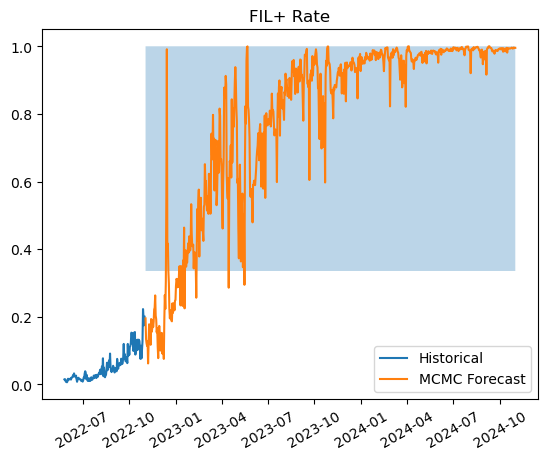

In [10]:
plt.figure()
y_pred_filplus = jnp.median(filplus_rate_pred, axis=0)
hpd_low, hpd_high = hpdi(y_pred_filplus)
plt.plot(x_train, y_train, label='Historical')
plt.plot(forecast_date_vec, y_pred_filplus, label='MCMC Forecast')
plt.fill_between(forecast_date_vec, hpd_low, hpd_high, alpha=0.3)

# sanity checking utilities
t_vec, historical_fpr_vec = u.get_historical_filplus_rate(train_start_date, train_end_date)
plt.plot(t_vec, historical_fpr_vec, linestyle=":", label='Historical Sanity Check')

plt.title('FIL+ Rate')
plt.xticks(rotation=30)
plt.legend()